# Базовое решение Задачи 3

**Датасет содержит по 54 столбца на строку, столбцы содержат следующие данные:**
- 1 временная метка (с)
- 2 частота сердечных сокращений (уд/мин)
- 3-19 данные с датчиков на руке
- 20-36 данные с датчиков на груди
- 37-53 данные с датчиков на лодыжкн

**Сенсорные данные IMU содержат следующие столбцы:**
- 1 температура (°C)
- 2-4 Данные 3D-ускорения (мс-2), масштаб: ±16g, разрешение: 13 бит
- 5-7 Данные 3D-ускорения (мс-2), масштаб: ±6g, разрешение: 13 бит*
- 8-10 данных 3D-гироскопа (рад/с)
- 11-13 Данные 3D-магнитометра (мкТл)

In [1]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

os.chdir("drive/My Drive/samsung/task3/")

In [22]:
df = pd.read_csv("Physical_Activity_Monitoring_unlabeled.csv")

df.head()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [23]:
df.columns

Index(['timestamp', 'handTemperature', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
       'subject_id'],
      dtype='object')

## Исследование данных

Прежде чем переходить к непосредственному построению модели, в первую очередь необходимо исследовать имеющихся у вас набор данных:
1. Какую задачу вы решаете (классификация, регрессия) и какая переменная является целевой?
2. Сколько переменных в данных и какого они типа?
3. Имеются ли в данных пропуски?

In [24]:
df.shape

(534601, 53)

In [25]:
df.dtypes

timestamp            float64
handTemperature      float64
handAcc16_1          float64
handAcc16_2          float64
handAcc16_3          float64
handAcc6_1           float64
handAcc6_2           float64
handAcc6_3           float64
handGyro1            float64
handGyro2            float64
handGyro3            float64
handMagne1           float64
handMagne2           float64
handMagne3           float64
handOrientation1     float64
handOrientation2     float64
handOrientation3     float64
handOrientation4     float64
chestTemperature     float64
chestAcc16_1         float64
chestAcc16_2         float64
chestAcc16_3         float64
chestAcc6_1          float64
chestAcc6_2          float64
chestAcc6_3          float64
chestGyro1           float64
chestGyro2           float64
chestGyro3           float64
chestMagne1          float64
chestMagne2          float64
chestMagne3          float64
chestOrientation1    float64
chestOrientation2    float64
chestOrientation3    float64
chestOrientati

<ipython-input-26-fbad80ce8bc9>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)


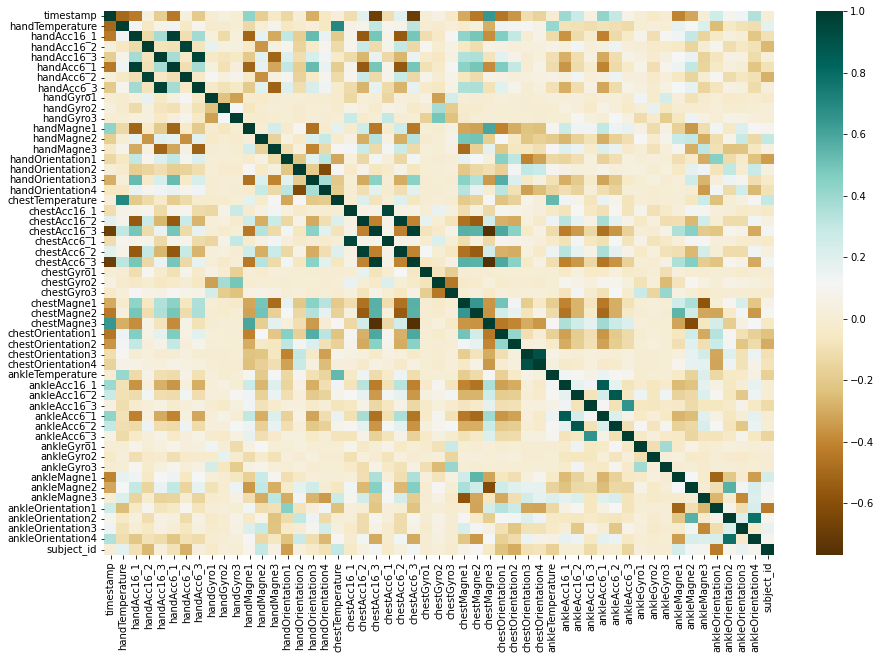

In [26]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

df_corr = df.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

In [27]:
df.isna().sum()

timestamp               0
handTemperature      4041
handAcc16_1          4041
handAcc16_2          4041
handAcc16_3          4041
handAcc6_1           4041
handAcc6_2           4041
handAcc6_3           4041
handGyro1            4041
handGyro2            4041
handGyro3            4041
handMagne1           4041
handMagne2           4041
handMagne3           4041
handOrientation1     4041
handOrientation2     4041
handOrientation3     4041
handOrientation4     4041
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3

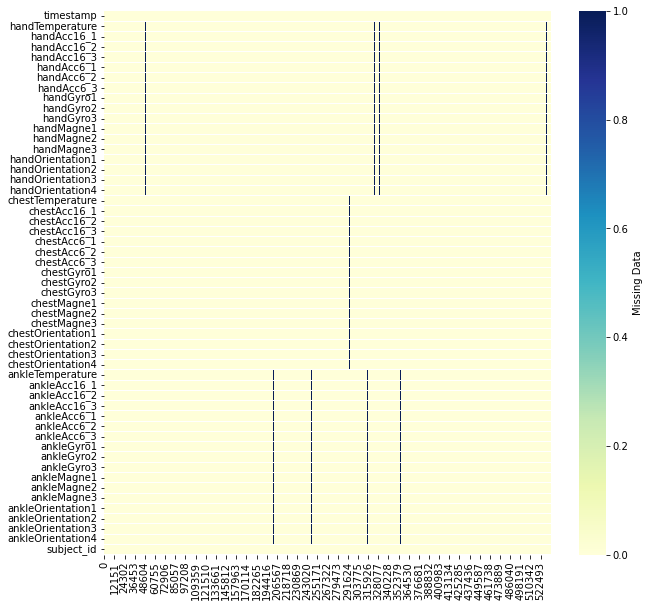

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [29]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import missingno as msno

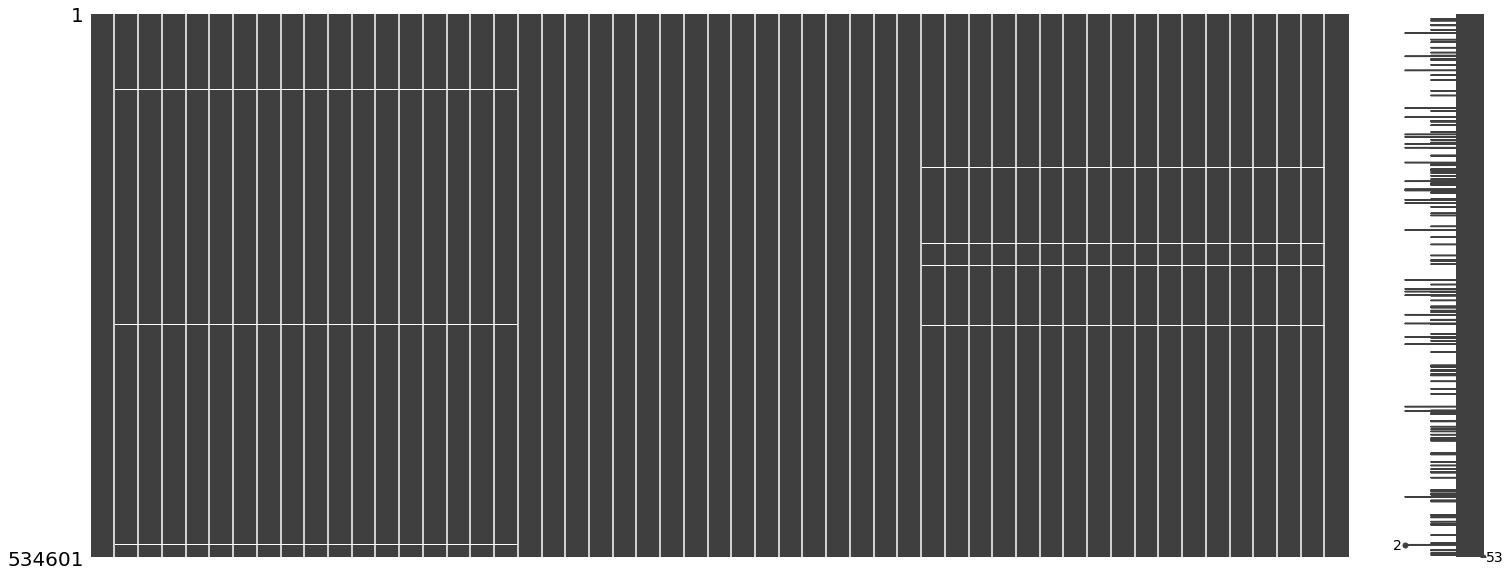

In [31]:
msno.matrix(df)

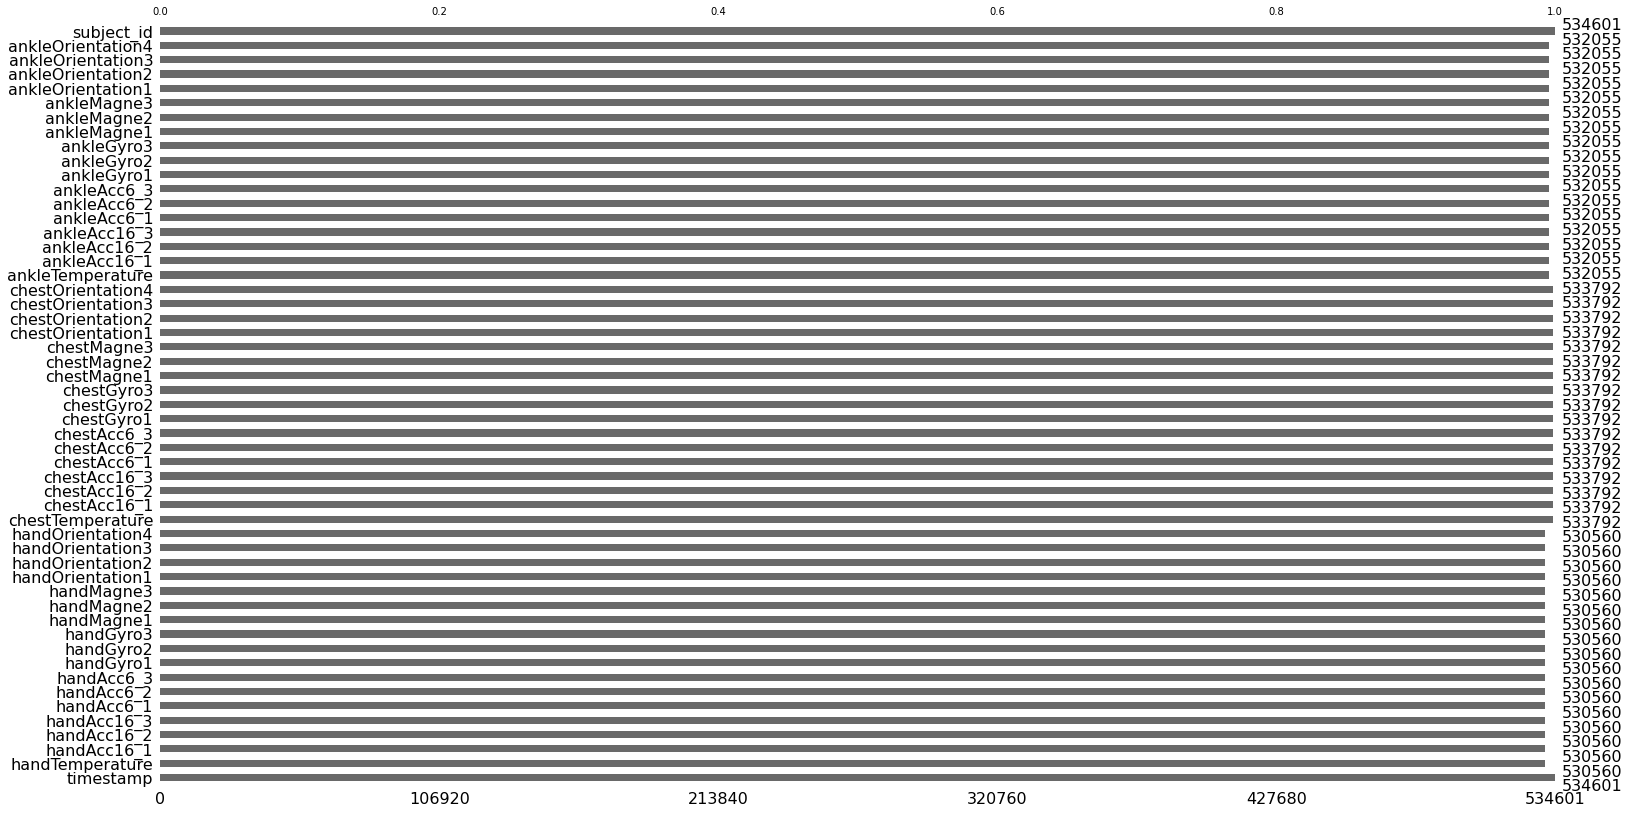

In [32]:
msno.bar(df)

**Ка видим в данных у нас имеются множество пропущенных значений.**

Так как датасет собран из реальных данных, то в жизни случается всякое.

Пустые значения в данном случае могут быть обусловлены следующими факторами:
* Потеря данных из-за использования беспроводных датчиков.
* Проблемы с настройкой оборудования, вызывающие, например. потерю соединения с датчиками или системный сбой.

Существуют две основные стратегии при работе с пропусками:
1. Удаление пропущенных значений
2. Заполнение пропусков

**Удаление.**

При удалении пропусков можно:
1. Удалять как целиком какой-то признак (например, если больше 70% для этого признака это пропуски, тогда мы можем целиком удалить данный столбец):
`df.drop(columns='name'])`

2. Удалить можно объекты у которых имеются пропущенные значения, т.е. в данном случае мы удаляем строки. *Но будьте внимательны так как удалять из тестового набора данных не всегда возможно, иначе размерность ответов не совпадет.*
`df.dropna()`

In [33]:
df.isna().sum() 

timestamp               0
handTemperature      4041
handAcc16_1          4041
handAcc16_2          4041
handAcc16_3          4041
handAcc6_1           4041
handAcc6_2           4041
handAcc6_3           4041
handGyro1            4041
handGyro2            4041
handGyro3            4041
handMagne1           4041
handMagne2           4041
handMagne3           4041
handOrientation1     4041
handOrientation2     4041
handOrientation3     4041
handOrientation4     4041
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3

In [17]:
#df.columns

In [18]:
# Заполним пропуски с помощью среднего значения

# col_missing = ['handAcc16_1', 'handAcc16_2',
#                'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
#                'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
#                'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
#                'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
#                'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
#                'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
#                'chestMagne3', 'chestOrientation1', 'chestOrientation2',
#                'chestOrientation3', 'chestOrientation4']

# for i in col_missing:
#     df[i].fillna(df[i].mean(), inplace=True)

# df.isna().sum()

In [34]:
df = df.drop(columns=['timestamp'])

In [35]:
%%time
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=20)
imputer.fit_transform(df)

df.isna().sum()

CPU times: user 55min 5s, sys: 45.4 s, total: 55min 51s
Wall time: 54min 39s


handTemperature      4041
handAcc16_1          4041
handAcc16_2          4041
handAcc16_3          4041
handAcc6_1           4041
handAcc6_2           4041
handAcc6_3           4041
handGyro1            4041
handGyro2            4041
handGyro3            4041
handMagne1           4041
handMagne2           4041
handMagne3           4041
handOrientation1     4041
handOrientation2     4041
handOrientation3     4041
handOrientation4     4041
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3         2546
ankleAcc6_1 

In [36]:
df = df.interpolate()
df.isna().sum()

handTemperature      0
handAcc16_1          0
handAcc16_2          0
handAcc16_3          0
handAcc6_1           0
handAcc6_2           0
handAcc6_3           0
handGyro1            0
handGyro2            0
handGyro3            0
handMagne1           0
handMagne2           0
handMagne3           0
handOrientation1     0
handOrientation2     0
handOrientation3     0
handOrientation4     0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3          0
ankleGyro1           0
ankleGyro2           0
ankleGyro3 

In [37]:
df.to_csv("filled_df.csv", index=False)

In [ ]:
#df = pd.read_csv("filled_df.csv")

## Нормализация

In [38]:
from sklearn.preprocessing import StandardScaler

df_std = StandardScaler().fit_transform(df)

scaled_df = pd.DataFrame(df_std, index=df.index, columns=df.columns)
scaled_df

,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,1.383760,0.757231,0.584776,0.510664,0.762694,0.616920,0.534955,-0.011434,-0.026646,-0.000382,...,0.010026,0.013753,0.737136,1.134555,-1.145553,-0.510941,0.786246,1.336797,-0.708140,0.190410
1,-1.542161,0.051790,0.072016,1.098267,-0.226447,0.000586,0.693620,0.107743,-0.437495,-0.007905,...,-1.032808,0.877262,-0.210992,-0.804863,-0.896624,0.725106,-0.851330,0.297695,-0.536677,-1.103768
2,1.098304,0.344312,-1.781430,-0.864405,0.364464,-1.869295,-0.835905,0.024908,0.014511,-0.007048,...,0.035695,-0.004352,0.515551,0.638528,0.590981,-0.732416,1.373972,0.262530,1.674988,1.484589
3,-0.293292,-1.252472,0.362269,-0.831548,-1.309192,0.393529,-0.897058,1.489085,-0.085672,-1.133556,...,-0.213025,-1.720091,0.104544,1.450536,0.369273,0.186609,1.565125,0.008559,1.114097,-1.103768
4,0.598757,0.627159,0.752136,0.083334,0.640523,0.780732,0.146643,0.001532,-0.039074,-0.020171,...,0.005874,-0.002954,0.569350,-0.275132,-0.208420,-0.628202,-1.176374,-0.146954,-0.890970,0.621803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,0.812849,-0.659715,0.202325,-0.310987,-0.753307,0.519869,-0.075309,-0.128408,0.805766,2.708128,...,0.738288,-0.422473,0.194368,-1.155074,0.497191,-0.139528,-1.093288,0.733590,-0.296111,0.190410
534597,1.044781,-0.466995,0.037284,-0.400220,-0.517513,0.195118,-0.254573,0.028656,0.193082,1.962559,...,-2.808538,-1.501461,-0.360189,1.335589,0.094996,0.251696,1.345437,0.198171,1.414949,0.190410
534598,1.276714,-0.274276,-0.127756,-0.489454,-0.281719,-0.129634,-0.433837,0.185719,-0.419602,1.216991,...,-0.003788,-0.198810,-1.085757,0.831770,-0.874481,0.669670,0.696299,1.318086,0.699344,0.190410
534599,-2.505574,1.404064,0.997765,-3.439181,1.803451,0.371647,-2.727570,3.067928,2.949408,0.054569,...,0.621058,-2.744020,-0.279940,-0.593700,1.398596,-0.990360,-1.266513,-1.047464,-0.906017,0.621803


## Понижение размерности

In [ ]:
%%time
from sklearn.decomposition import PCA

pca = PCA(n_components=25)

PC = pca.fit_transform(scaled_df)

principalDf = pd.DataFrame(data = PC)

CPU times: user 9.39 s, sys: 2.07 s, total: 11.5 s
Wall time: 7.29 s


построим матрицу корреляции

<ipython-input-25-f566aa699d2d>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(principalDf_corr, mask=np.zeros_like(principalDf_corr, dtype=np.bool), cmap = "BrBG",ax=ax)


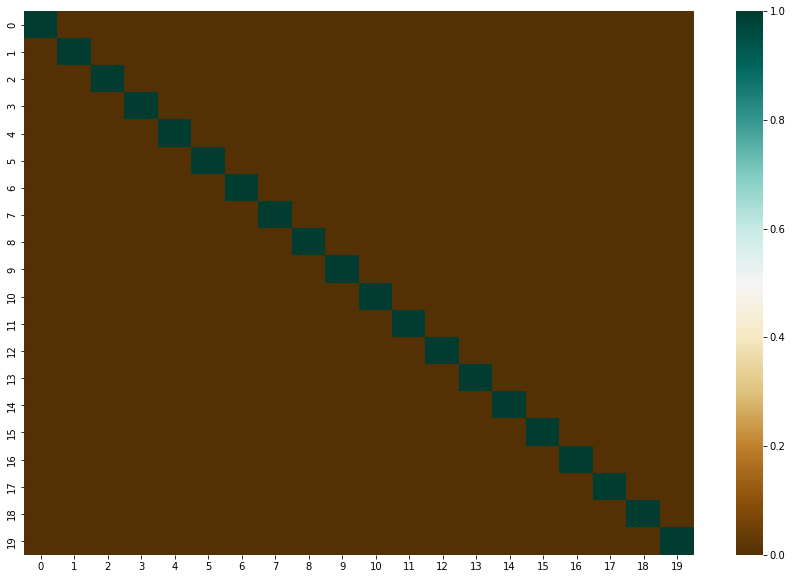

In [ ]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

principalDf_corr = principalDf.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(principalDf_corr, mask=np.zeros_like(principalDf_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

In [ ]:
pca = PCA(.85)

principalComponents = pca.fit_transform(scaled_df)
pca.n_components_ 

22

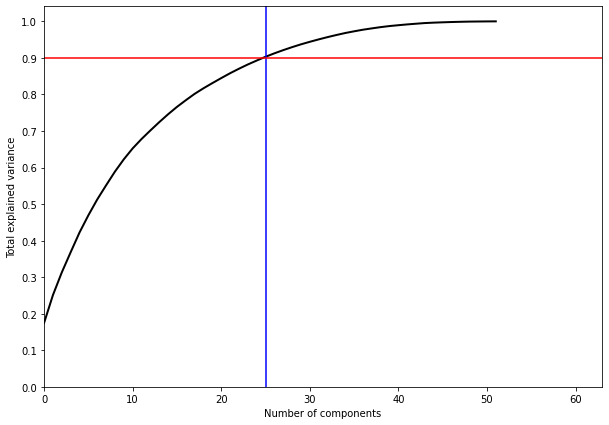

CPU times: user 7.15 s, sys: 525 ms, total: 7.67 s
Wall time: 4.24 s


In [ ]:
%%time
import numpy as np
from sklearn.decomposition import PCA

pca = PCA().fit(scaled_df)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(25, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [ ]:
%%time
from sklearn.decomposition import PCA

pca = PCA(n_components=25)

principalComponents = pca.fit_transform(scaled_df)

principalDf = pd.DataFrame(data = principalComponents)

evr = pca.explained_variance_ratio_
evr.sum()

CPU times: user 10.4 s, sys: 2.31 s, total: 12.8 s
Wall time: 7.94 s


0.8926448092837294

## Кластеризация

In [ ]:
df = principalDf.copy()

In [39]:
# %%time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# inertia = []
# silhouette_coefficients = []

# for k in range(3, 4):
#     kmeans = KMeans(n_clusters=k, random_state=1).fit(principalComponents)
#     inertia.append(np.sqrt(kmeans.inertia_))
#     score = silhouette_score(principalComponents, kmeans.labels_)
#     silhouette_coefficients.append(score)

# plt.plot(range(2, 12), inertia, marker='s');
# plt.xlabel('$k$')
# plt.ylabel('$J(C_k)$');

In [40]:
inertia_df = pd.DataFrame(data=[], index=range(2, 12), columns=['inertia'])
                                                             
for n_clusters in range(2, 16):
    clusterer = KMeans(n_clusters=n_clusters,  random_state=42)
    cluster_labels = clusterer.fit_predict(df)
    
    # inertia
    inertia_df.loc[n_clusters] = clusterer.inertia_

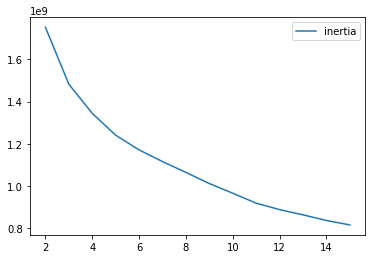

In [41]:
inertia_df.plot()

In [ ]:
# plt.style.use("fivethirtyeight")
# plt.plot(range(2, 12), silhouette_coefficients)
# plt.xticks(range(2, 12))
# plt.xlabel("Number of Clusters")
# plt.ylabel("Silhouette Coefficient")
# plt.show()

In [42]:
%%time
n_clusters = 5

clusterer = KMeans(n_clusters=n_clusters, init = 'k-means++')

cluster_labels = clusterer.fit_predict(df)

# inertia
inertia = clusterer.inertia_

CPU times: user 31.6 s, sys: 1.57 s, total: 33.2 s
Wall time: 18.9 s


In [43]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

For n_clusters = 5 , the inertia is : 1240557216.068709


In [44]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(53460, 52)


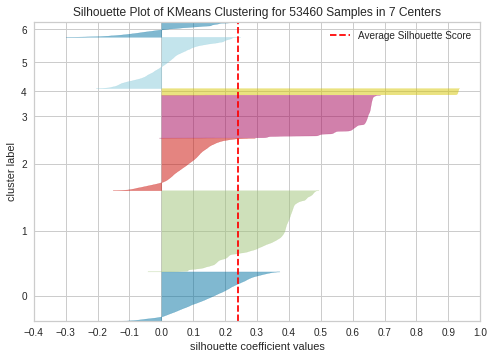

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa82ad9d160>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=7, random_state=42))

In [45]:
from yellowbrick.cluster import silhouette_visualizer

X = df.sample(frac=0.1)
print(X.shape)
silhouette_visualizer(KMeans(7, random_state=42), X, colors='yellowbrick')

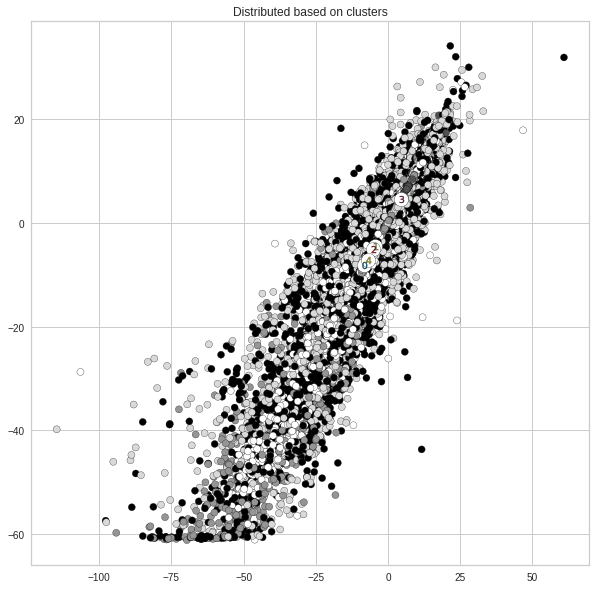

In [46]:
plt.figure(figsize=(10,10))

plt.scatter(df.iloc[:, 1], df.iloc[:, 4], c=cluster_labels, edgecolor='k')

centers = clusterer.cluster_centers_

plt.scatter(centers[:, 1], centers[:, 4], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[1], c[4], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')
    
plt.title("Distributed based on clusters");

In [47]:
import numpy as np

len(np.unique(cluster_labels))

5

In [48]:
scaled_df_hand = scaled_df[['handTemperature', 'handAcc16_1', 'handAcc16_2',
                           'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
                           'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
                           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']]

scaled_df_chest = scaled_df[['chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
                            'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
                            'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
                            'chestMagne3', 'chestOrientation1', 'chestOrientation2',
                            'chestOrientation3', 'chestOrientation4']]

scaled_df_ankle = scaled_df[['ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
                            'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
                            'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
                            'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']]

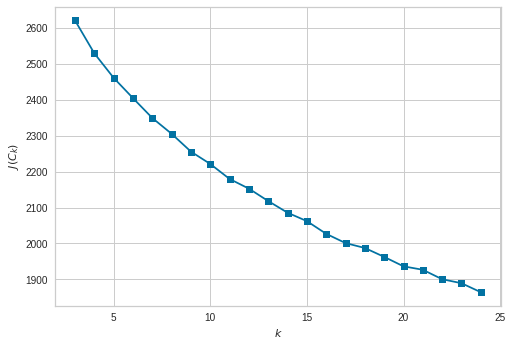

In [49]:
inertia_hand = []

for k in range(3, 25):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(scaled_df_hand)
    inertia_hand.append(np.sqrt(kmeans.inertia_))

plt.plot(range(3, 25), inertia_hand, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

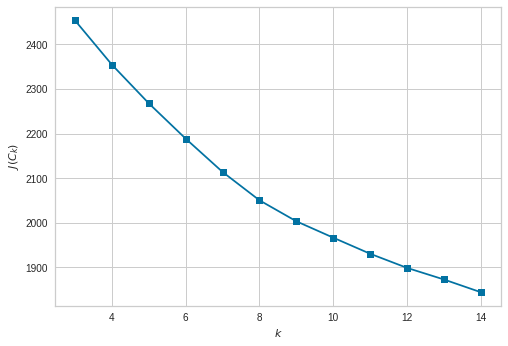

In [50]:
inertia_chest = []

for k in range(3, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(scaled_df_chest)
    inertia_chest.append(np.sqrt(kmeans.inertia_))

plt.plot(range(3, 15), inertia_chest, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [53]:
inertia_ankle = []

for k in range(3, 25):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(scaled_df_ankle)
    inertia_ankle.append(np.sqrt(kmeans.inertia_))



In [56]:
inertia_ankle

[2655.3324261513767,
 2543.3005279666586,
 2453.155959763438,
 2375.9081195222407,
 2315.140654034006,
 2264.41841847597,
 2220.6568568825255,
 2178.7407163840508,
 2148.5877366601244,
 2116.934168658213,
 2081.277011857141,
 2055.766920564988,
 2031.889919157502,
 1998.3186403401144,
 1983.3054977982063,
 1959.852272750413,
 1934.6877448054092,
 1903.444909278878,
 1899.9271599711249,
 1868.251941528309,
 1856.0184413576646,
 1840.5758271228983]

ValueError: ignored

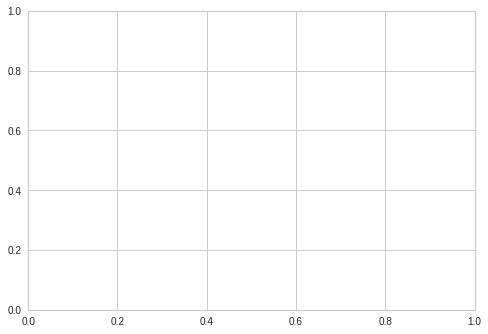

In [57]:
plt.plot(range(3, 22), inertia_ankle, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [58]:
%%time
from sklearn.cluster import KMeans

n_init = 20
max_iter = 30
tol = 0.0001
random_state = 42
n_clusters = 3

clusterer = KMeans(n_clusters=n_clusters, max_iter = max_iter, random_state = random_state)

cluster_labels = clusterer.fit_predict(scaled_df_chest)

# inertia
inertia = clusterer.inertia_

CPU times: user 12 s, sys: 1.02 s, total: 13 s
Wall time: 6.84 s


## Подготовка ответов

In [59]:
predictions = pd.DataFrame(cluster_labels, columns=['activityID'])
predictions = predictions.reset_index()

predictions

,index,activityID
0,0,0
1,1,2
2,2,1
3,3,1
4,4,1
...,...,...
534596,534596,2
534597,534597,1
534598,534598,1
534599,534599,1


In [60]:
pr = predictions['activityID'].unique()

In [61]:
change = dict(zip(pr, list([x for x in range(len(pr))])))

In [62]:
change

{0: 0, 2: 1, 1: 2}

In [63]:
ans = predictions.copy()

In [64]:
ans['activityID'].apply(lambda x: change[x])

0         0
1         1
2         2
3         2
4         2
         ..
534596    1
534597    2
534598    2
534599    2
534600    1
Name: activityID, Length: 534601, dtype: int64

In [65]:
ans

,index,activityID
0,0,0
1,1,2
2,2,1
3,3,1
4,4,1
...,...,...
534596,534596,2
534597,534597,1
534598,534598,1
534599,534599,1


In [66]:
ans.to_csv("submission.csv", index=False)